In [284]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.11 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import seaborn as sns
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_Copenhagen_Metro_stations"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
Metro_stations = df_list[1]
Metro_stations = Metro_stations.drop(columns=["Time to Nørreport (M1 and M2)", "Transfer", "Grade"])
Future_Metro_stations = df_list[2]
Future_Metro_stations = Future_Metro_stations.drop(columns=["Transfer"])


Metro_stations.iloc[0,1] = "M3"
Metro_stations.iloc[1,1] = "M2"
Metro_stations.iloc[2,1] = "M2"
Metro_stations.iloc[3,1] = "M1"
Metro_stations.iloc[4,1] = "M1, M2"
Metro_stations.iloc[5,1] = "M1"
Metro_stations.iloc[6,1] = "M3"
Metro_stations.iloc[7,1] = "M1, M2"
Metro_stations.iloc[8,1] = "M2"
Metro_stations.iloc[9,1] = "M1, M2"
Metro_stations.iloc[10,1] = "M1, M2"
Metro_stations.iloc[11,1] = "M1, M2, M3"
Metro_stations.iloc[12,1] = "M3"
Metro_stations.iloc[13,1] = "M3, M4"
Metro_stations.iloc[14,1] = "M1"
Metro_stations.iloc[15,1] = "M2"
Metro_stations.iloc[16,1] = "M3, M4"
Metro_stations.iloc[17,1] = "M1, M2, M3, M4"
Metro_stations.iloc[18,1] = "M2"
Metro_stations.iloc[19,1] = "M1, M2"
Metro_stations.iloc[20,1] = "M2"
Metro_stations.iloc[21,1] = "M3, M4"
Metro_stations.iloc[22,1] = "M4"
Metro_stations.iloc[23,1] = "M3"
Metro_stations.iloc[24,1] = "M3"
Metro_stations.iloc[25,1] = "M1, M2"
Metro_stations.iloc[26,1] = "M3"
Metro_stations.iloc[27,1] = "M4"
Metro_stations.iloc[28,1] = "M1"
Metro_stations.iloc[29,1] = "M2"
Metro_stations.iloc[30,1] = "M3, M4"
Metro_stations.iloc[31,1] = "M3"
Metro_stations.iloc[32,1] = "M3, M4"
Metro_stations.iloc[33,1] = "M3"
Metro_stations.iloc[34,1] = "M1"
Metro_stations.iloc[35,1] = "M3"
Metro_stations.iloc[36,1] = "M1, M2"
Metro_stations.iloc[37,1] = "M1"
Metro_stations.iloc[38,1] = "M3"
Future_Metro_stations.iloc[0,1]= "M4"
Future_Metro_stations.iloc[1,1]= "M4"
Future_Metro_stations.iloc[2,1]= "M4"
Future_Metro_stations.iloc[3,1]= "M4"
Future_Metro_stations.iloc[4,1]= "M4"

for i in range(Metro_stations.shape[0]):
    if Metro_stations.iloc[i,0].endswith('#'):
        Metro_stations.iloc[i,0]= Metro_stations.iloc[i,0].replace('#','')
    elif Metro_stations.iloc[i,0].endswith('†'):
        Metro_stations.iloc[i,0]= Metro_stations.iloc[i,0].replace('†','')

Metro_stations

newdf= pd.DataFrame( columns=['Latitude', 'Longitude'])
newdf1= pd.DataFrame( columns=['Latitude', 'Longitude'])
newdf2= pd.DataFrame( columns=['Latitude', 'Longitude'])
newdf3= pd.DataFrame( columns=['Latitude', 'Longitude'])

geolocator = Nominatim(user_agent="Cph_explorer")
for i in range( 14, Metro_stations.shape[0]):
    location = geolocator.geocode('{} Station, Denmark'.format(Metro_stations.iloc[i,0]))
    if location != None:
            newdf.loc[i,'Latitude'] = location.latitude
            newdf.loc[i,'Longitude']= location.longitude
    else:
            print(Metro_stations.iloc[i,0])
            location = geolocator.geocode('{}, Denmark'.format(Metro_stations.iloc[i,0]))
            newdf.loc[i,'Latitude'] = location.latitude
            newdf.loc[i,'Longitude']= location.longitude
Metro_stations=pd.concat([Metro_stations,newdf], axis=1)
Metro_stations.iloc[29,4]=55.6616667 
Metro_stations.iloc[29,5]=12.6286111
Metro_stations.to_csv('Metro_stations.csv')

for i in range(Future_Metro_stations.shape[0]):
    location = geolocator.geocode('{} Station, Denmark'.format(Future_Metro_stations.iloc[i,0]))
    if location != None:
            newdf1.loc[i,'Latitude'] = location.latitude
            newdf1.loc[i,'Longitude']= location.longitude
    else:
            print(Future_Metro_stations.iloc[i,0])
Future_Metro_stations=pd.concat([Future_Metro_stations,newdf1], axis=1)
Future_Metro_stations.to_csv('Future_Metro_stations.csv')

import pandas as pd
import requests

url2 = "https://en.wikipedia.org/wiki/List_of_Copenhagen_S-train_stations"

r2 = requests.get(url2)
df_list2 = pd.read_html(r2.text) # this parses all the tables in webpages to a list
Train_stations = df_list2[1]
Train_stations = Train_stations.drop(columns=["Time", "Transfer"])
Future_Train_stations = df_list2[2]
#Future_Train_stations = Future_Train_stations.drop(columns=["Time", "Transfer"])
Train_stations.iloc[0,1] = "B, Bx"
Train_stations.iloc[1,1] = "E"
Train_stations.iloc[2,1] = "A"
Train_stations.iloc[3,1] = "A, Bx"
Train_stations.iloc[4,1] = "C, H"
Train_stations.iloc[5,1] = "B"
Train_stations.iloc[6,1] = "E"
Train_stations.iloc[7,1] = "F"
Train_stations.iloc[8,1] = "A"
Train_stations.iloc[9,1] = "B"
Train_stations.iloc[10,1] = "A, Bx"
Train_stations.iloc[11,1] = "B, C, H, Bx"
Train_stations.iloc[12,1] = "C"
Train_stations.iloc[13,1] = "B, Bx, F"
Train_stations.iloc[14,1] = "A, B, Bx, C, E, H"
Train_stations.iloc[15,1] = "A"
Train_stations.iloc[16,1] = "C, H"
Train_stations.iloc[17,1] = "A"
Train_stations.iloc[18,1] = "A, Bx"
Train_stations.iloc[19,1] = "C, F, H"
Train_stations.iloc[20,1] = "C, H"
Train_stations.iloc[21,1] = "A, E"
Train_stations.iloc[22,1] = "F"
Train_stations.iloc[23,1] = "F"
Train_stations.iloc[24,1] = "B"
Train_stations.iloc[25,1] = "B, Bx"
Train_stations.iloc[26,1] = "A, E"
Train_stations.iloc[27,1] = "A, Bx"
Train_stations.iloc[28,1] = "B, C, E, F"
Train_stations.iloc[29,1] = "C, H"
Train_stations.iloc[30,1] = "E"
Train_stations.iloc[31,1] = "B, E"
Train_stations.iloc[32,1] = "A, E"
Train_stations.iloc[33,1] = "C, H"

Train_stations.iloc[34,1] = "B, Bx"
Train_stations.iloc[35,1] = "B, Bx"
Train_stations.iloc[36,1] = "A, E"
Train_stations.iloc[37,1] = "C"
Train_stations.iloc[38,1] = "E"
Train_stations.iloc[39,1] = "C"
Train_stations.iloc[40,1] = "B, E"
Train_stations.iloc[41,1] = "A, E"
Train_stations.iloc[42,1] = "F"
Train_stations.iloc[43,1] = "A"
Train_stations.iloc[44,1] = "C"
Train_stations.iloc[45,1] = "C"
Train_stations.iloc[46,1] = "A, B, Bx, C, E, H"
Train_stations.iloc[47,1] = "A, E"
Train_stations.iloc[48,1] = "A, E"
Train_stations.iloc[49,1] = "C"
Train_stations.iloc[50,1] = "B, E"
Train_stations.iloc[51,1] = "C, H"
Train_stations.iloc[52,1] = "C, H"
Train_stations.iloc[53,1] = "A, B, Bx, C, E"
Train_stations.iloc[54,1] = "A, F, E"
Train_stations.iloc[55,1] = "F"
Train_stations.iloc[56,1] = "A, B, Bx, C, E, H"
Train_stations.iloc[57,1] = "C"
Train_stations.iloc[58,1] = "C"
Train_stations.iloc[59,1] = "B, F, H"
Train_stations.iloc[60,1] = "B, Bx"
Train_stations.iloc[61,1] = "A"
Train_stations.iloc[62,1] = "C"
Train_stations.iloc[63,1] = "A, E"
Train_stations.iloc[64,1] = "A, E"
Train_stations.iloc[65,1] = "B, E"
Train_stations.iloc[66,1] = "A, Bx"
Train_stations.iloc[67,1] = "C, H"
Train_stations.iloc[68,1] = "A, B, C, E, Bx"
Train_stations.iloc[69,1] = "A, E"
Train_stations.iloc[70,1] = "B, Bx"
Train_stations.iloc[71,1] = "B, Bx, C, H"
Train_stations.iloc[72,1] = "A"
Train_stations.iloc[73,1] = "A, Bx"
Train_stations.iloc[74,1] = "C, H"
Train_stations.iloc[75,1] = "C, H"
Train_stations.iloc[76,1] = "A, B, Bx, C, E, H"
Train_stations.iloc[77,1] = "F"
Train_stations.iloc[78,1] = "B"
Train_stations.iloc[79,1] = "A, Bx"
Train_stations.iloc[80,1] = "E"
Train_stations.iloc[81,1] = "C, H"
Train_stations.iloc[82,1] = "A, B, Bx, C, E, H"
Train_stations.iloc[83,1] = "F"
Train_stations.iloc[84,1] = "A"
Future_Train_stations.iloc[0,1]= "A"
Future_Train_stations.iloc[1,1]= "C, H"
Future_Train_stations = Future_Train_stations.drop(columns=["Time", "Transfer"])

for i in range(Train_stations.shape[0]):
    if Train_stations.iloc[i,0].endswith('#'):
        Train_stations.iloc[i,0]= Train_stations.iloc[i,0].replace('#','')
    elif Train_stations.iloc[i,0].endswith('†'):
        Train_stations.iloc[i,0]= Train_stations.iloc[i,0].replace('†','')
for i in range(Future_Train_stations.shape[0]):
    if Future_Train_stations.iloc[i,0].endswith('[3]'):
        Future_Train_stations.iloc[i,0]= Future_Train_stations.iloc[i,0].replace('[3]','')
    elif Future_Train_stations.iloc[i,0].endswith('[4]'):
        Future_Train_stations.iloc[i,0]= Future_Train_stations.iloc[i,0].replace('[4]','')

geolocator = Nominatim(user_agent="Cph_explorer")
for i in range(12, Train_stations.shape[0]):
    location = geolocator.geocode('{} Station, Denmark'.format(Train_stations.iloc[i,0]))
    if location != None:
            newdf2.loc[i,'Latitude'] = location.latitude
            newdf2.loc[i,'Longitude']= location.longitude
    else:
            print(Train_stations.iloc[i,0])
            location = geolocator.geocode('{}, Denmark'.format(Train_stations.iloc[i,0]))
            newdf2.loc[i,'Latitude'] = location.latitude
            newdf2.loc[i,'Longitude']= location.longitude

Train_stations=pd.concat([Train_stations,newdf2], axis=1)
Train_stations.to_csv('Train_stations.csv')

for i in range(Future_Train_stations.shape[0]):
    location = geolocator.geocode('{} Station, Denmark'.format(Future_Train_stations.iloc[i,0]))
    if location != None:
        newdf3.loc[i,'Latitude'] = location.latitude
        newdf3.loc[i,'Longitude']= location.longitude
    else:
        print(Future_Train_stations.iloc[i,0])
        location = geolocator.geocode('{}, Denmark'.format(Future_Train_stations.iloc[i,0]))
        newdf3.loc[i,'Latitude'] = location.latitude
        newdf3.loc[i,'Longitude']= location.longitude
Future_Train_stations=pd.concat([Future_Train_stations,newdf3], axis=1)
Future_Train_stations.to_csv('Future_Train_stations.csv')

In [285]:
Metro_stations=pd.read_csv('Metro_stations.csv')
Metro_stations.iloc[20,5]=55.6308333
Metro_stations.iloc[20,6]=12.6491667
Metro_stations.iloc[34,5]=55.645222
Metro_stations.iloc[34,6]=12.58575
Metro_stations=Metro_stations.drop(columns=['Unnamed: 0'])
Future_Metro_stations=pd.read_csv('Future_Metro_stations.csv')
Future_Metro_stations=Future_Metro_stations.drop(columns=['Unnamed: 0'])
Train_stations=pd.read_csv('Train_stations.csv')
Train_stations=Train_stations.drop(columns=['Unnamed: 0'])
Future_Train_stations=pd.read_csv('Future_Train_stations.csv')
Future_Train_stations=Future_Train_stations.drop(columns=['Unnamed: 0'])
Future_Train_stations=Future_Train_stations.rename(columns={"Future station": "Station"})


In [286]:
geolocator = Nominatim(user_agent="Cph_explorer")
location = geolocator.geocode('Copenhagen, Denmark')
ltd = location.latitude
lntd = location.longitude
print('The geograpical coordinate of Copenhagen, the capital of Denmark, are {}, {}.'.format(ltd, lntd))

The geograpical coordinate of Copenhagen, the capital of Denmark, are 55.6867243, 12.5700724.


# download Copenhagen geojson file
!wget --quiet http://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:afgraensning_oversigtskort&outputFormat=json&SRSNAME=EPSG:4326 -O Copenhagen.json
    
print('GeoJSON file downloaded!')

In [265]:
url='https://services.kortforsyningen.dk/?servicename=RestGeokeys_v2&method=kommune&regkode=1084&token=cb599716a1d2127367853014fa7fa1e5'
results = requests.get(url).json()


In [287]:
import branca
# create map of Copenhagen using latitude and longitude values
map_CPH = folium.Map(location=[ltd, lntd], zoom_start=10, tiles='Stamen Terrain')

# add markers to map
for lat, lng, Station, Line in zip(Train_stations['Latitude'], Train_stations['Longitude'], Train_stations['Station'], Train_stations['Line']):
    label = u'{} Train Station, Line: {}'.format(Station, Line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CPH) 
    
for lat, lng, Station, Line in zip(Metro_stations['Latitude'], Metro_stations['Longitude'], Metro_stations['Station'], Metro_stations['Line']):
    label = '{} Metro Station, Line: {}'.format(Station, Line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='PuBu',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CPH)
    
for lat, lng, Station, Line in zip(Future_Metro_stations['Latitude'], Future_Metro_stations['Longitude'], Future_Metro_stations['Station'], Future_Metro_stations['Line']):
    label = 'Future: {} Metro Station, Line: {}'.format(Station, Line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='PuBu',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CPH)  
    
for lat, lng, Station, Line in zip(Future_Train_stations['Latitude'], Future_Train_stations['Longitude'], Future_Train_stations['Station'], Future_Train_stations['Line']):
    label = 'Future: {} Train Station, Line: {}'.format(Station, Line)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='PuBu',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CPH)  

    #map_CPH.choropleth(
    #geo_data=results,
    #data=df_can,
    #columns=['Country', 'Total'],
    #key_on='feature.properties.name',
    #fill_color='PuOr', 
    #fill_opacity=0.7, 
    #line_opacity=0.2,
    #legend_name='Immigration to Canada')


   
map_CPH

In [288]:
Transport_data=Metro_stations.append([Future_Metro_stations, Train_stations, Future_Train_stations], ignore_index=True)

Transport_data['Coordinates']=Transport_data['Latitude'].astype(str)+","+ Transport_data['Longitude'].astype(str)


In [289]:
Transport_data.head()

,Station,Line,Opened,Zone,Latitude,Longitude,Grade,Opens,Coordinates
0,Aksel Møllers Have,M3,2019,1,55.686051,12.532947,NaN,NaN,"55.686050699999996,12.5329471"
1,Amager Strand,M2,2007,3,55.656135,12.631858,NaN,NaN,"55.6561353,12.6318585"
2,Amagerbro,M2,2002,1,55.663396,12.602895,NaN,NaN,"55.6633965,12.602894500000001"
3,Bella Center,M1,2002,3,55.638072,12.582932,NaN,NaN,"55.6380721,12.582932099999999"
4,Christianshavn,"M1, M2",2003,1,55.672374,12.588578,NaN,NaN,"55.67237370000001,12.588578199999999"


**FourSqaure Credentials**


In [551]:
CLIENT_ID = 'SIBIHQFDK1SAYYZMIIFIKUHTBJOSRHSK1E42CBECAN3QGQLD' 
CLIENT_SECRET = 'B2LOXLDUNL4T1FBIUYEFTH5QAT22YSFF1MYA1NQWGDHOI4DV' 
VERSION = '20180605' 

In [552]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [553]:
len(results['response']['categories'])

KeyError: 'categories'

There are 10 top-level categories and multiple subcategories


In [294]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [296]:
def get_venues_count(ll, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [297]:
#Create new dataframe to store venues data
stations_venues_df = Transport_data.copy()
stations_venues_df=stations_venues_df.drop(columns=['Line','Opened','Zone','Grade','Opens'])
for c in categories_list:
    stations_venues_df[c[0]] = 0

In [307]:
#Request number of venues, store result as CSV
from itertools import islice
for i, row in islice(stations_venues_df.iterrows(), 81, None):
    print(i)
    for c in categories_list:        
        stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.Coordinates.iloc[i], radius=1000, categoryId=c[1])
    stations_venues_df.to_csv('stations_venues.csv')

81


KeyError: 'totalResults'

In [312]:
stations_venues_df.to_csv('stations_venues.csv')


In [329]:
stations_venues_df[stations_venues_df.columns[~stations_venues_df.columns.isin(['Latitude', 'Longitude'])]]

#stations_venues_df[stations_venues_df.columns.difference(['Coordinates'])]

,Cluster Labels,Station,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,2,Aksel Møllers Have,8,53,0,93,26,37,47,3,69,13
1,0,Amager Strand,11,3,0,17,4,20,11,3,9,4
2,2,Amagerbro,4,42,0,73,13,28,28,16,61,12
3,2,Bella Center,4,3,0,34,5,11,43,4,73,11
4,1,Christianshavn,50,14,0,139,72,62,52,16,63,54
5,0,DR Byen,3,43,0,16,8,13,30,11,13,4
6,1,Enghave Plads,28,10,1,131,63,39,43,3,83,23
7,2,Fasanvej,22,61,1,94,20,36,41,9,68,13
8,0,Femøren,5,4,0,10,6,18,11,0,9,6
9,2,Flintholm,4,5,1,38,5,17,28,9,47,14


In [330]:
stations_venues_df = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues_df.head()
#stations_venues_df.drop(['Latitude', 'Longitude'], axis=1, inplace= True)

,Station,Latitude,Longitude,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Aksel Møllers Have,55.686051,12.532947,"55.686050699999996,12.5329471",8,53,0,93,26,37,47,3,69,13
1,Amager Strand,55.656135,12.631858,"55.6561353,12.6318585",11,3,0,17,4,20,11,3,9,4
2,Amagerbro,55.663396,12.602894,"55.6633965,12.602894500000001",4,42,0,73,13,28,28,16,61,12
3,Bella Center,55.638072,12.582932,"55.6380721,12.582932099999999",4,3,0,34,5,11,43,4,73,11
4,Christianshavn,55.672374,12.588578,"55.67237370000001,12.588578199999999",50,14,0,139,72,62,52,16,63,54


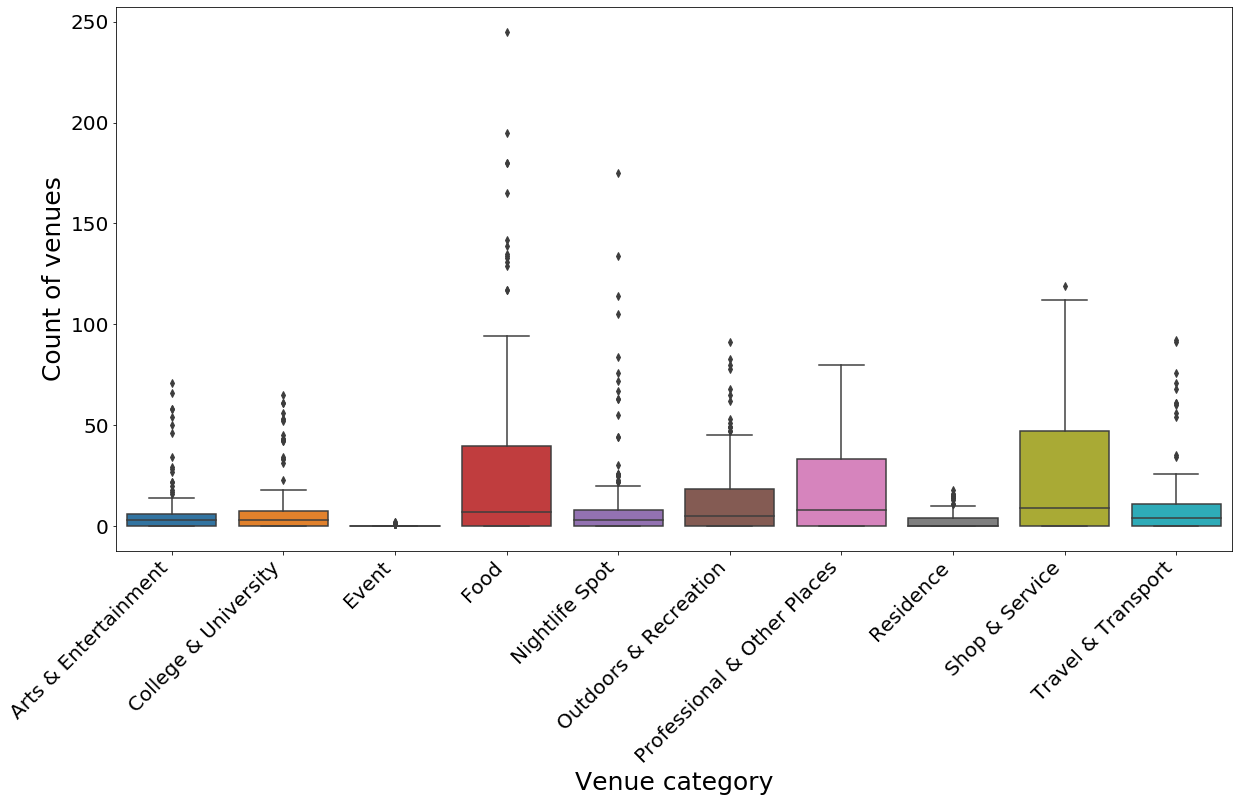

In [331]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues_df[stations_venues_df.columns[~stations_venues_df.columns.isin(['Latitude', 'Longitude'])]])
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [332]:
# set number of clusters
kclusters = 3

#drop Event from venue category as its counts are marginal 
stations_venues_df_Clustering = stations_venues_df.drop(['Station','Coordinates','Event','Latitude', 'Longitude'], 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stations_venues_df_Clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 2, 1, 0, 1, 2, 0, 2], dtype=int32)

In [333]:
# add clustering labels
stations_venues_df.insert(0, 'Cluster Labels', kmeans.labels_)

#manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

stations_venues_df.head() # check the last columns!

,Cluster Labels,Station,Latitude,Longitude,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,2,Aksel Møllers Have,55.686051,12.532947,"55.686050699999996,12.5329471",8,53,0,93,26,37,47,3,69,13
1,0,Amager Strand,55.656135,12.631858,"55.6561353,12.6318585",11,3,0,17,4,20,11,3,9,4
2,2,Amagerbro,55.663396,12.602894,"55.6633965,12.602894500000001",4,42,0,73,13,28,28,16,61,12
3,2,Bella Center,55.638072,12.582932,"55.6380721,12.582932099999999",4,3,0,34,5,11,43,4,73,11
4,1,Christianshavn,55.672374,12.588578,"55.67237370000001,12.588578199999999",50,14,0,139,72,62,52,16,63,54


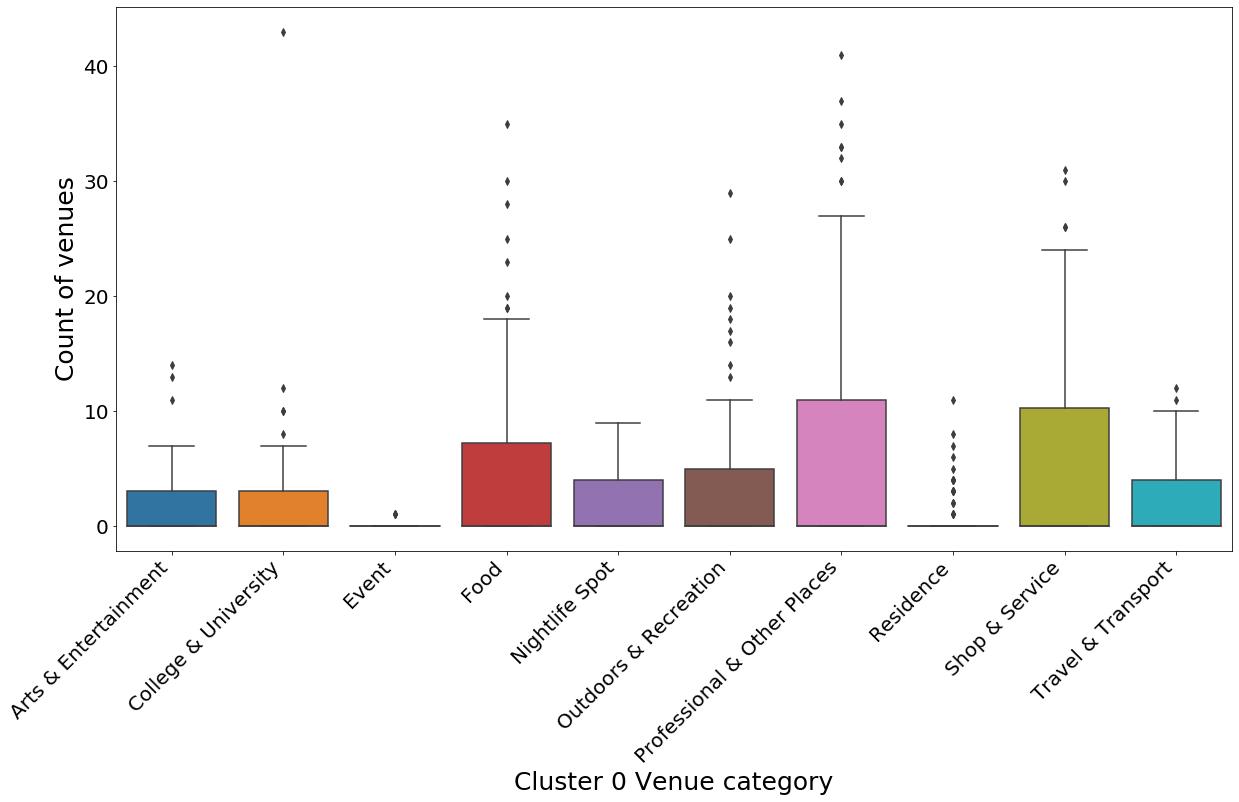

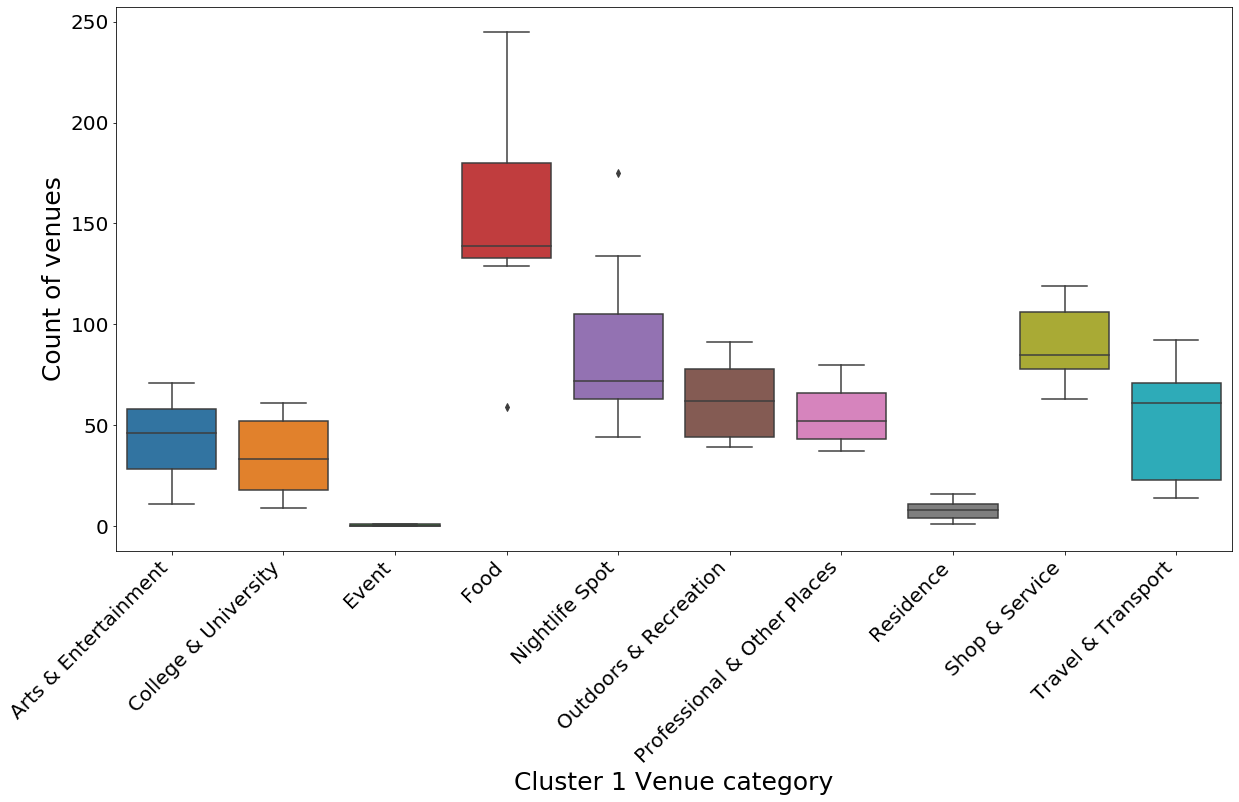

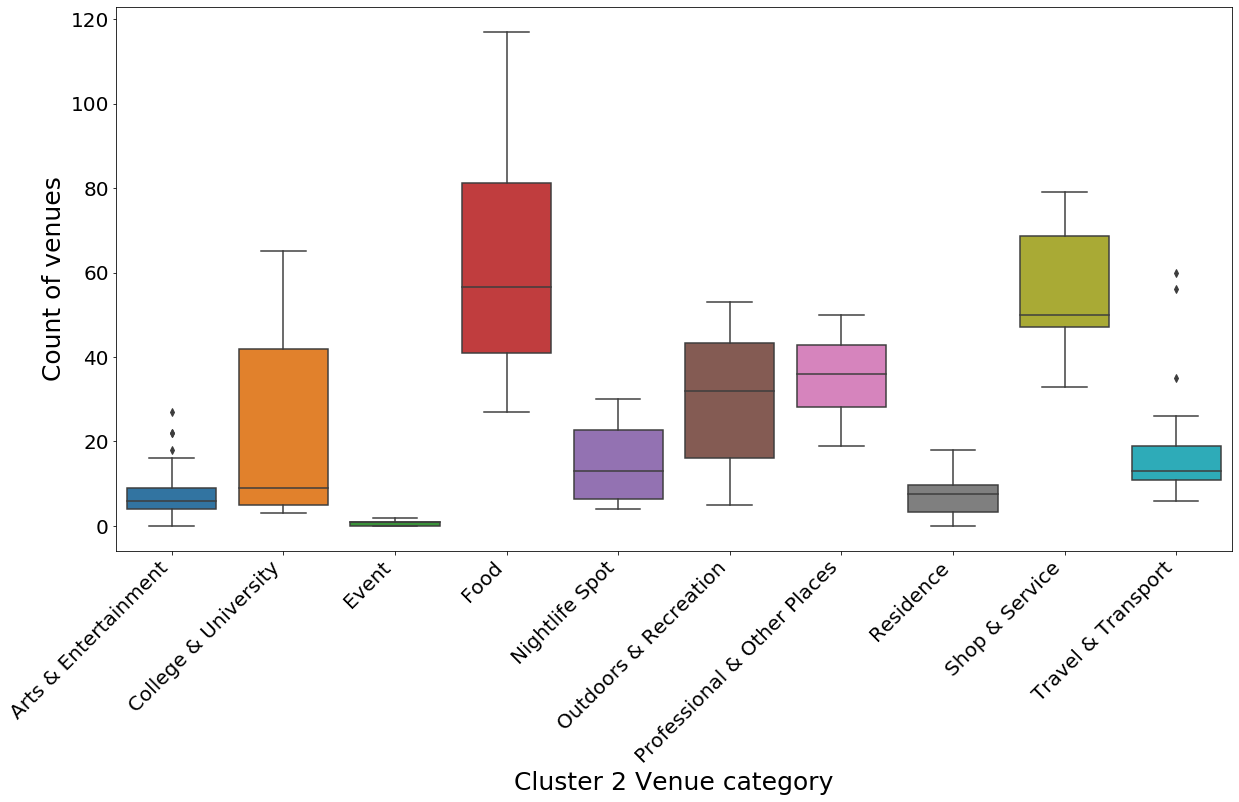

In [338]:
for i in range(kclusters):
    plt.figure(figsize=(20, 10))
    plt.xticks(rotation='vertical')
    sns.boxplot

    condition=stations_venues_df['Cluster Labels']==i
    stations_venues_df_i=stations_venues_df[condition]
    stations_venues_df_i=stations_venues_df_i[stations_venues_df_i.columns[~stations_venues_df_i.columns.isin(['Cluster Labels','Latitude', 'Longitude'])]]
    ax = sns.boxplot(data = stations_venues_df_i)
    ax.set_ylabel('Count of venues', fontsize=25)
    ax.set_xlabel('Cluster {} Venue category'.format(i), fontsize=25)
    ax.tick_params(labelsize=20)
    plt.xticks(rotation=45, ha='right')

plt.show()

In [340]:
# create map
map_clusters = folium.Map(location=[ltd, lntd], zoom_start=10, tiles='Stamen Toner')
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stations_venues_df['Latitude'], stations_venues_df['Longitude'], stations_venues_df['Station'], stations_venues_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [341]:
stations_venues_df.insert(0, 'Commune', 0)

,Commune,Cluster Labels,Station,Latitude,Longitude,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,2,Aksel Møllers Have,55.686051,12.532947,"55.686050699999996,12.5329471",8,53,0,93,26,37,47,3,69,13
1,0,0,Amager Strand,55.656135,12.631858,"55.6561353,12.6318585",11,3,0,17,4,20,11,3,9,4
2,0,2,Amagerbro,55.663396,12.602894,"55.6633965,12.602894500000001",4,42,0,73,13,28,28,16,61,12
3,0,2,Bella Center,55.638072,12.582932,"55.6380721,12.582932099999999",4,3,0,34,5,11,43,4,73,11
4,0,1,Christianshavn,55.672374,12.588578,"55.67237370000001,12.588578199999999",50,14,0,139,72,62,52,16,63,54
5,0,0,DR Byen,55.655766,12.588994,"55.6557655,12.5889939",3,43,0,16,8,13,30,11,13,4
6,0,1,Enghave Plads,55.666534,12.544432,"55.6665336,12.544431610370712",28,10,1,131,63,39,43,3,83,23
7,0,2,Fasanvej,55.681609,12.523502,"55.681608600000004,12.5235021",22,61,1,94,20,36,41,9,68,13
8,0,0,Femøren,55.645188,12.638338,"55.6451882,12.638338000000001",5,4,0,10,6,18,11,0,9,6
9,0,2,Flintholm,55.685874,12.499490,"55.685874399999996,12.499489599999999",4,5,1,38,5,17,28,9,47,14


In [386]:
stations_venues_df.insert(0, 'Commune', 0)
for i in range(stations_venues_df.shape[0]):
    url='https://services.kortforsyningen.dk/?servicename=RestGeokeys_v2&method=kommune&geop={},{}&georef=EPSG:4326&token=cb599716a1d2127367853014fa7fa1e5'.format(stations_venues_df['Longitude'][i],stations_venues_df['Latitude'][i])
    results = requests.get(url).json()
    stations_venues_df.loc[i,'Commune'] = results['features'][0]['properties']['navn']

In [660]:
stations_venues_df

,Commune,Cluster Labels,Station,Latitude,Longitude,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Frederiksberg,2,Aksel Møllers Have,55.686051,12.532947,"55.686050699999996,12.5329471",8,53,0,93,26,37,47,3,69,13
1,København,0,Amager Strand,55.656135,12.631858,"55.6561353,12.6318585",11,3,0,17,4,20,11,3,9,4
2,København,2,Amagerbro,55.663396,12.602894,"55.6633965,12.602894500000001",4,42,0,73,13,28,28,16,61,12
3,København,2,Bella Center,55.638072,12.582932,"55.6380721,12.582932099999999",4,3,0,34,5,11,43,4,73,11
4,København,1,Christianshavn,55.672374,12.588578,"55.67237370000001,12.588578199999999",50,14,0,139,72,62,52,16,63,54
5,København,0,DR Byen,55.655766,12.588994,"55.6557655,12.5889939",3,43,0,16,8,13,30,11,13,4
6,København,1,Enghave Plads,55.666534,12.544432,"55.6665336,12.544431610370712",28,10,1,131,63,39,43,3,83,23
7,Frederiksberg,2,Fasanvej,55.681609,12.523502,"55.681608600000004,12.5235021",22,61,1,94,20,36,41,9,68,13
8,København,0,Femøren,55.645188,12.638338,"55.6451882,12.638338000000001",5,4,0,10,6,18,11,0,9,6
9,Frederiksberg,2,Flintholm,55.685874,12.499490,"55.685874399999996,12.499489599999999",4,5,1,38,5,17,28,9,47,14


In [674]:
#Transaction price realised
House_df = pd.read_csv('House Prices2.csv', encoding= 'unicode_escape', skiprows=2)

In [675]:
House_df.rename(columns={House_df.columns[0]: "0", House_df.columns[1]: "Property Type", House_df.columns[2]: "Commune"}, inplace= True)
House_df.drop(columns="0", inplace= True)
House_df.drop(House_df.index[0], inplace= True)
for i in range(House_df.shape[0]):
    while House_df.iloc[i,0] == ' ':
        House_df.iloc[i,0]=housetype
    else:
        housetype=House_df.iloc[i,0]
House_df.drop([1,26,51],inplace= True)
House_df.reset_index(drop=True, inplace= True)


In [676]:
House_df.insert(2, 'Cluster0', 0)
House_df.insert(3, 'Cluster1', 0)
House_df.insert(4, 'Cluster2', 0)

for i in range(House_df.shape[0]):
    for RAM in range(stations_venues_df.shape[0]):
        if House_df.iloc[i, 1]==stations_venues_df.iloc[RAM,0]:
            Cluster=stations_venues_df.iloc[RAM,1]
            if Cluster ==0:
                House_df.iloc[i,2]="1"
            elif Cluster ==1:
                House_df.iloc[i,3]="1"
            elif Cluster ==2:
                House_df.iloc[i,4]="1"
        elif House_df.iloc[i, 1]=='Copenhagen':
            House_df.iloc[i,2]="1"
            House_df.iloc[i,3]="1"
            House_df.iloc[i,4]="1"

House_df.replace({'..': 0}, inplace= True) 
columns=House_df.columns[~House_df.columns.isin(['Cluster1', 'Cluster2', 'Cluster0','Commune','Property Type'])]
House_df[columns]=House_df[columns].astype(int)


In [677]:
House_df_grouped0=House_df[House_df.columns[~House_df.columns.isin(['Cluster1', 'Cluster2'])]]
House_df_grouped0 = House_df_grouped0[House_df_grouped0.Cluster0 != 0]
House_df_grouped0.drop(columns=["Commune","Cluster0"])
House_df_grouped0=House_df_grouped0.groupby(['Property Type'],as_index=False).median()
House_df_grouped0[columns]=House_df_grouped0[columns].astype(int)

House_df_grouped1=House_df[House_df.columns[~House_df.columns.isin(['Cluster0', 'Cluster2'])]]
House_df_grouped1 = House_df_grouped1[House_df_grouped1.Cluster1 != 0]
House_df_grouped1.drop(columns=["Commune","Cluster1"])
House_df_grouped1=House_df_grouped1.groupby(['Property Type'],as_index=False).median()
House_df_grouped1[columns]=House_df_grouped1[columns].astype(int)


House_df_grouped2=House_df[House_df.columns[~House_df.columns.isin(['Cluster0', 'Cluster1'])]]
House_df_grouped2 = House_df_grouped2[House_df_grouped2.Cluster2 != 0]
House_df_grouped2.drop(columns=["Commune","Cluster2"])
House_df_grouped2=House_df_grouped2.groupby(['Property Type'],as_index=False).median()
House_df_grouped2[columns]=House_df_grouped2[columns].astype(int)


In [678]:
#holiday median is zerosssss
House_df_grouped0.drop([1],inplace= True)
House_df_grouped0.reset_index(drop=True, inplace= True)
House_df_grouped1.drop([1],inplace= True)
House_df_grouped1.reset_index(drop=True, inplace= True)
House_df_grouped2.drop([1],inplace= True)
House_df_grouped2.reset_index(drop=True, inplace= True)
House_df_grouped2

,Property Type,1992Q1,1992Q2,1992Q3,1992Q4,1993Q1,1993Q2,1993Q3,1993Q4,1994Q1,1994Q2,1994Q3,1994Q4,1995Q1,1995Q2,1995Q3,1995Q4,1996Q1,1996Q2,1996Q3,1996Q4,1997Q1,1997Q2,1997Q3,1997Q4,1998Q1,1998Q2,1998Q3,1998Q4,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,2002Q3,2002Q4,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,2007Q3,2007Q4,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Detached/terraced house,5355,5626,6075,5856,5275,5860,5976,5916,6196,6167,6113,5968,6172,6299,6316,6911,6764,6991,7277,7523,7670,8474,8891,9189,9201,9758,9679,9878,10095,10590,10594,11078,10637,11759,11737,12562,12419,13367,13713,13422,14159,14256,14364,14191,14333,15552,15222,15715,16139,16857,17269,18771,19501,21562,23821,25553,27206,27479,28366,29214,27942,27929,26836,23753,26852,26058,24502,22342,20825,20847,21954,22090,22775,24160,24260,24357,23203,25144,24307,22525,22289,23782,23343,22932,24217,24611,24334,25883,25429,26568,27162,27951,28418,29930,30276,29875,31561,31159,32114,30752,32044,33937,34306,34013,36761,35334,35701,37494,36347,36202,37183,38782
1,Owner-occupied flat,6529,6440,5899,6256,5532,5505,6394,6085,6320,6414,5691,5908,5744,5813,6350,5992,6019,6738,6310,6776,7139,7228,7372,8500,8757,8547,9046,9475,10271,10706,11220,11597,12066,12329,13118,13499,13795,14518,15348,15254,15935,16273,16655,16917,17636,17591,17557,17665,18550,19200,20224,21083,22480,24659,27399,29501,30086,31849,31430,29282,27788,27182,26925,25840,24767,24458,23293,21232,20030,20479,20580,21530,22321,23326,23164,23252,23559,23268,21939,22269,22160,22214,22855,23457,24451,25825,25897,26459,26590,27538,27964,27922,29414,31393,31651,31895,32384,34213,34706,35249,36329,37525,39046,39182,40236,40592,40055,39558,40142,39700,39781,40664


In [679]:
House_df_grouped0.iloc[0,1:] = House_df_grouped0.iloc[0,1:].ewm(com=0.5).mean()
House_df_grouped0.iloc[1,1:] = House_df_grouped0.iloc[1,1:].ewm(com=0.5).mean()
House_df_grouped0[columns]=House_df_grouped0[columns].astype(int)

House_df_grouped1.iloc[0,1:] = House_df_grouped1.iloc[0,1:].ewm(com=0.5).mean()
House_df_grouped1.iloc[1,1:] = House_df_grouped1.iloc[1,1:].ewm(com=0.5).mean()
House_df_grouped1[columns]=House_df_grouped1[columns].astype(int)

House_df_grouped2.iloc[0,1:] = House_df_grouped2.iloc[0,1:].ewm(com=0.5).mean()
House_df_grouped2.iloc[1,1:] = House_df_grouped2.iloc[1,1:].ewm(com=0.5).mean()
House_df_grouped2[columns]=House_df_grouped2[columns].astype(int)


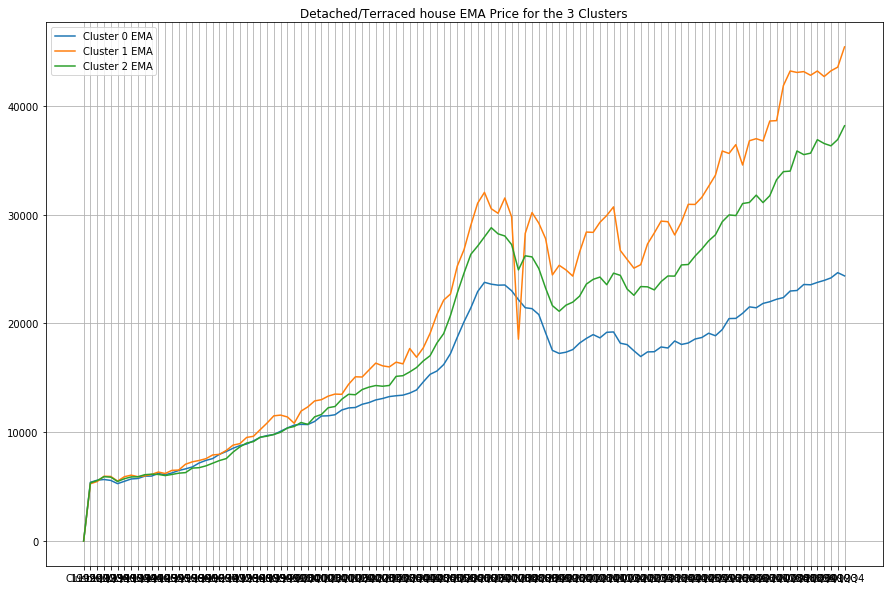

In [691]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(House_df_grouped0.iloc[0,1:],label='Cluster 0 EMA')
plt.plot(House_df_grouped1.iloc[0,1:],label='Cluster 1 EMA')
plt.plot(House_df_grouped2.iloc[0,1:],label='Cluster 2 EMA')
plt.title('Detached/Terraced house EMA Price for the 3 Clusters')
plt.legend(loc=2)

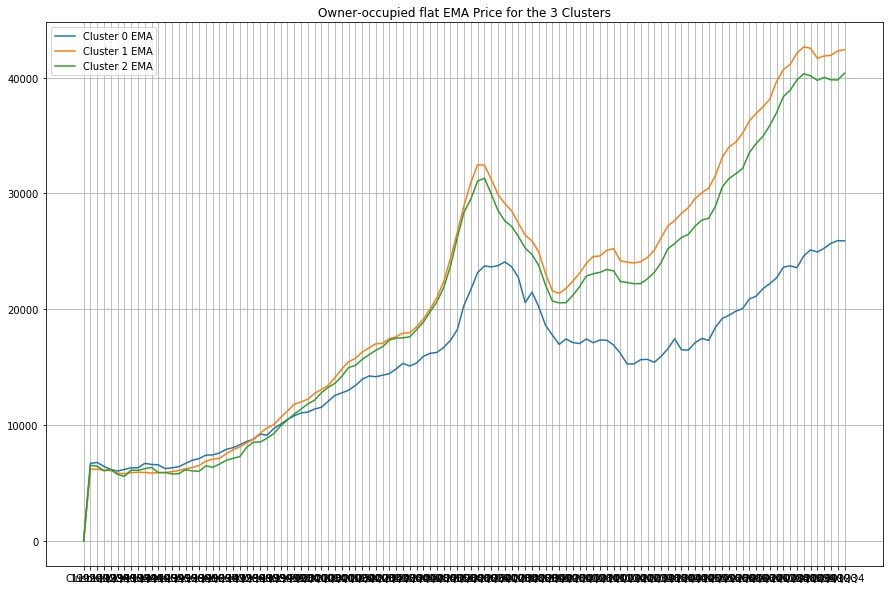

In [692]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(House_df_grouped0.iloc[1,1:],label='Cluster 0 EMA')
plt.plot(House_df_grouped1.iloc[1,1:],label='Cluster 1 EMA')
plt.plot(House_df_grouped2.iloc[1,1:],label='Cluster 2 EMA')
plt.title('Owner-occupied flat EMA Price for the 3 Clusters')
plt.legend(loc=2)

In [680]:
House_df_grouped0.insert(1, 'Cluster', 0)
House_df_grouped1.insert(1, 'Cluster', 1)
House_df_grouped2.insert(1, 'Cluster', 2)
House_df_grouped=House_df_grouped0.append([House_df_grouped1, House_df_grouped2], ignore_index=True)
H_pivoted=House_df_grouped.pivot_table(House_df_grouped[columns], ['Property Type','Cluster'])
H_pivoted

1992Q1  1992Q2  1992Q3  1992Q4  1993Q1  \
Property Type           Cluster                                           
Detached/terraced house 0          5402    5591    5658    5573    5276   
                        1          5269    5470    5959    5938    5512   
                        2          5355    5558    5916    5875    5473   
Owner-occupied flat     0          6704    6784    6443    6177    6040   
                        1          6186    6216    6096    6081    5857   
                        2          6529    6462    6072    6196    5751   

                                 1993Q2  1993Q3  1993Q4  1994Q1  1994Q2  \
Property Type           Cluster                                           
Detached/terraced house 0          5491    5706    5752    5964    5972   
                        1          5915    6058    5916    5992    6124   
                        2          5731    5894    5908    6100    6144   
Owner-occupied flat     0          6188    6325    6322    6704    6617   
                        1          5811    5907    5937    5925    5875   
                        2          5586    6125    6098    6246    6358   

                                 1994Q3  1994Q4  1995Q1  1995Q2  1995Q3  \
Property Type           Cluster                                           
Detached/terraced house 0          6218    6087    6262    6485    6634   
                        1          6342    6208    6496    6528    7061   
                        2          6123    6019    6121    6239    6290   
Owner-occupied flat     0          6577    6253    6323    6417    6701   
                        1          5903    5924    5987    6096    6234   
                        2          5913    5909    5799    5808    6169   

                                 1995Q4  1996Q1  1996Q2  1996Q3  1996Q4  \
Property Type           Cluster                                           
Detached/terraced house 0          6810    7174    7413    7580    7978   
                        1          7279    7405    7569    7914    7970   
                        2          6704    6744    6908    7154    7400   
Owner-occupied flat     0          6973    7121    7415    7435    7602   
                        1          6350    6525    6893    7064    7142   
                        2          6051    6029    6501    6373    6641   

                                 1997Q1  1997Q2  1997Q3  1997Q4  1998Q1  \
Property Type           Cluster                                           
Detached/terraced house 0          8229    8529    8773    8918    9209   
                        1          8328    8817    8952    9523    9627   
                        2          7580    8176    8652    9010    9137   
Owner-occupied flat     0          7916    8059    8311    8594    8788   
                        1          7538    7882    8127    8469    8790   
                        2          6973    7143    7295    8098    8537   

                                 1998Q2  1998Q3  1998Q4  1999Q1  1999Q2  \
Property Type           Cluster                                           
Detached/terraced house 0          9530    9694    9789   10091   10392   
                        1         10241   10843   11507   11573   11403   
                        2          9551    9636    9797    9995   10391   
Owner-occupied flat     0          9232    9138    9718   10086   10499   
                        1          9315    9771   10043   10673   11219   
                        2          8543    8878    9276    9939   10450   

                                 1999Q3  1999Q4  2000Q1  2000Q2  2000Q3  \
Property Type           Cluster                                           
Detached/terraced house 0         10652   10723   10706   10989   11487   
                        1         10825   11939   12327   12873   12989   
                        2         10526   10894   10722   11413   11629   
Owner-occupied flat     0         10816   11053   11

<Figure size 432x288 with 0 Axes>

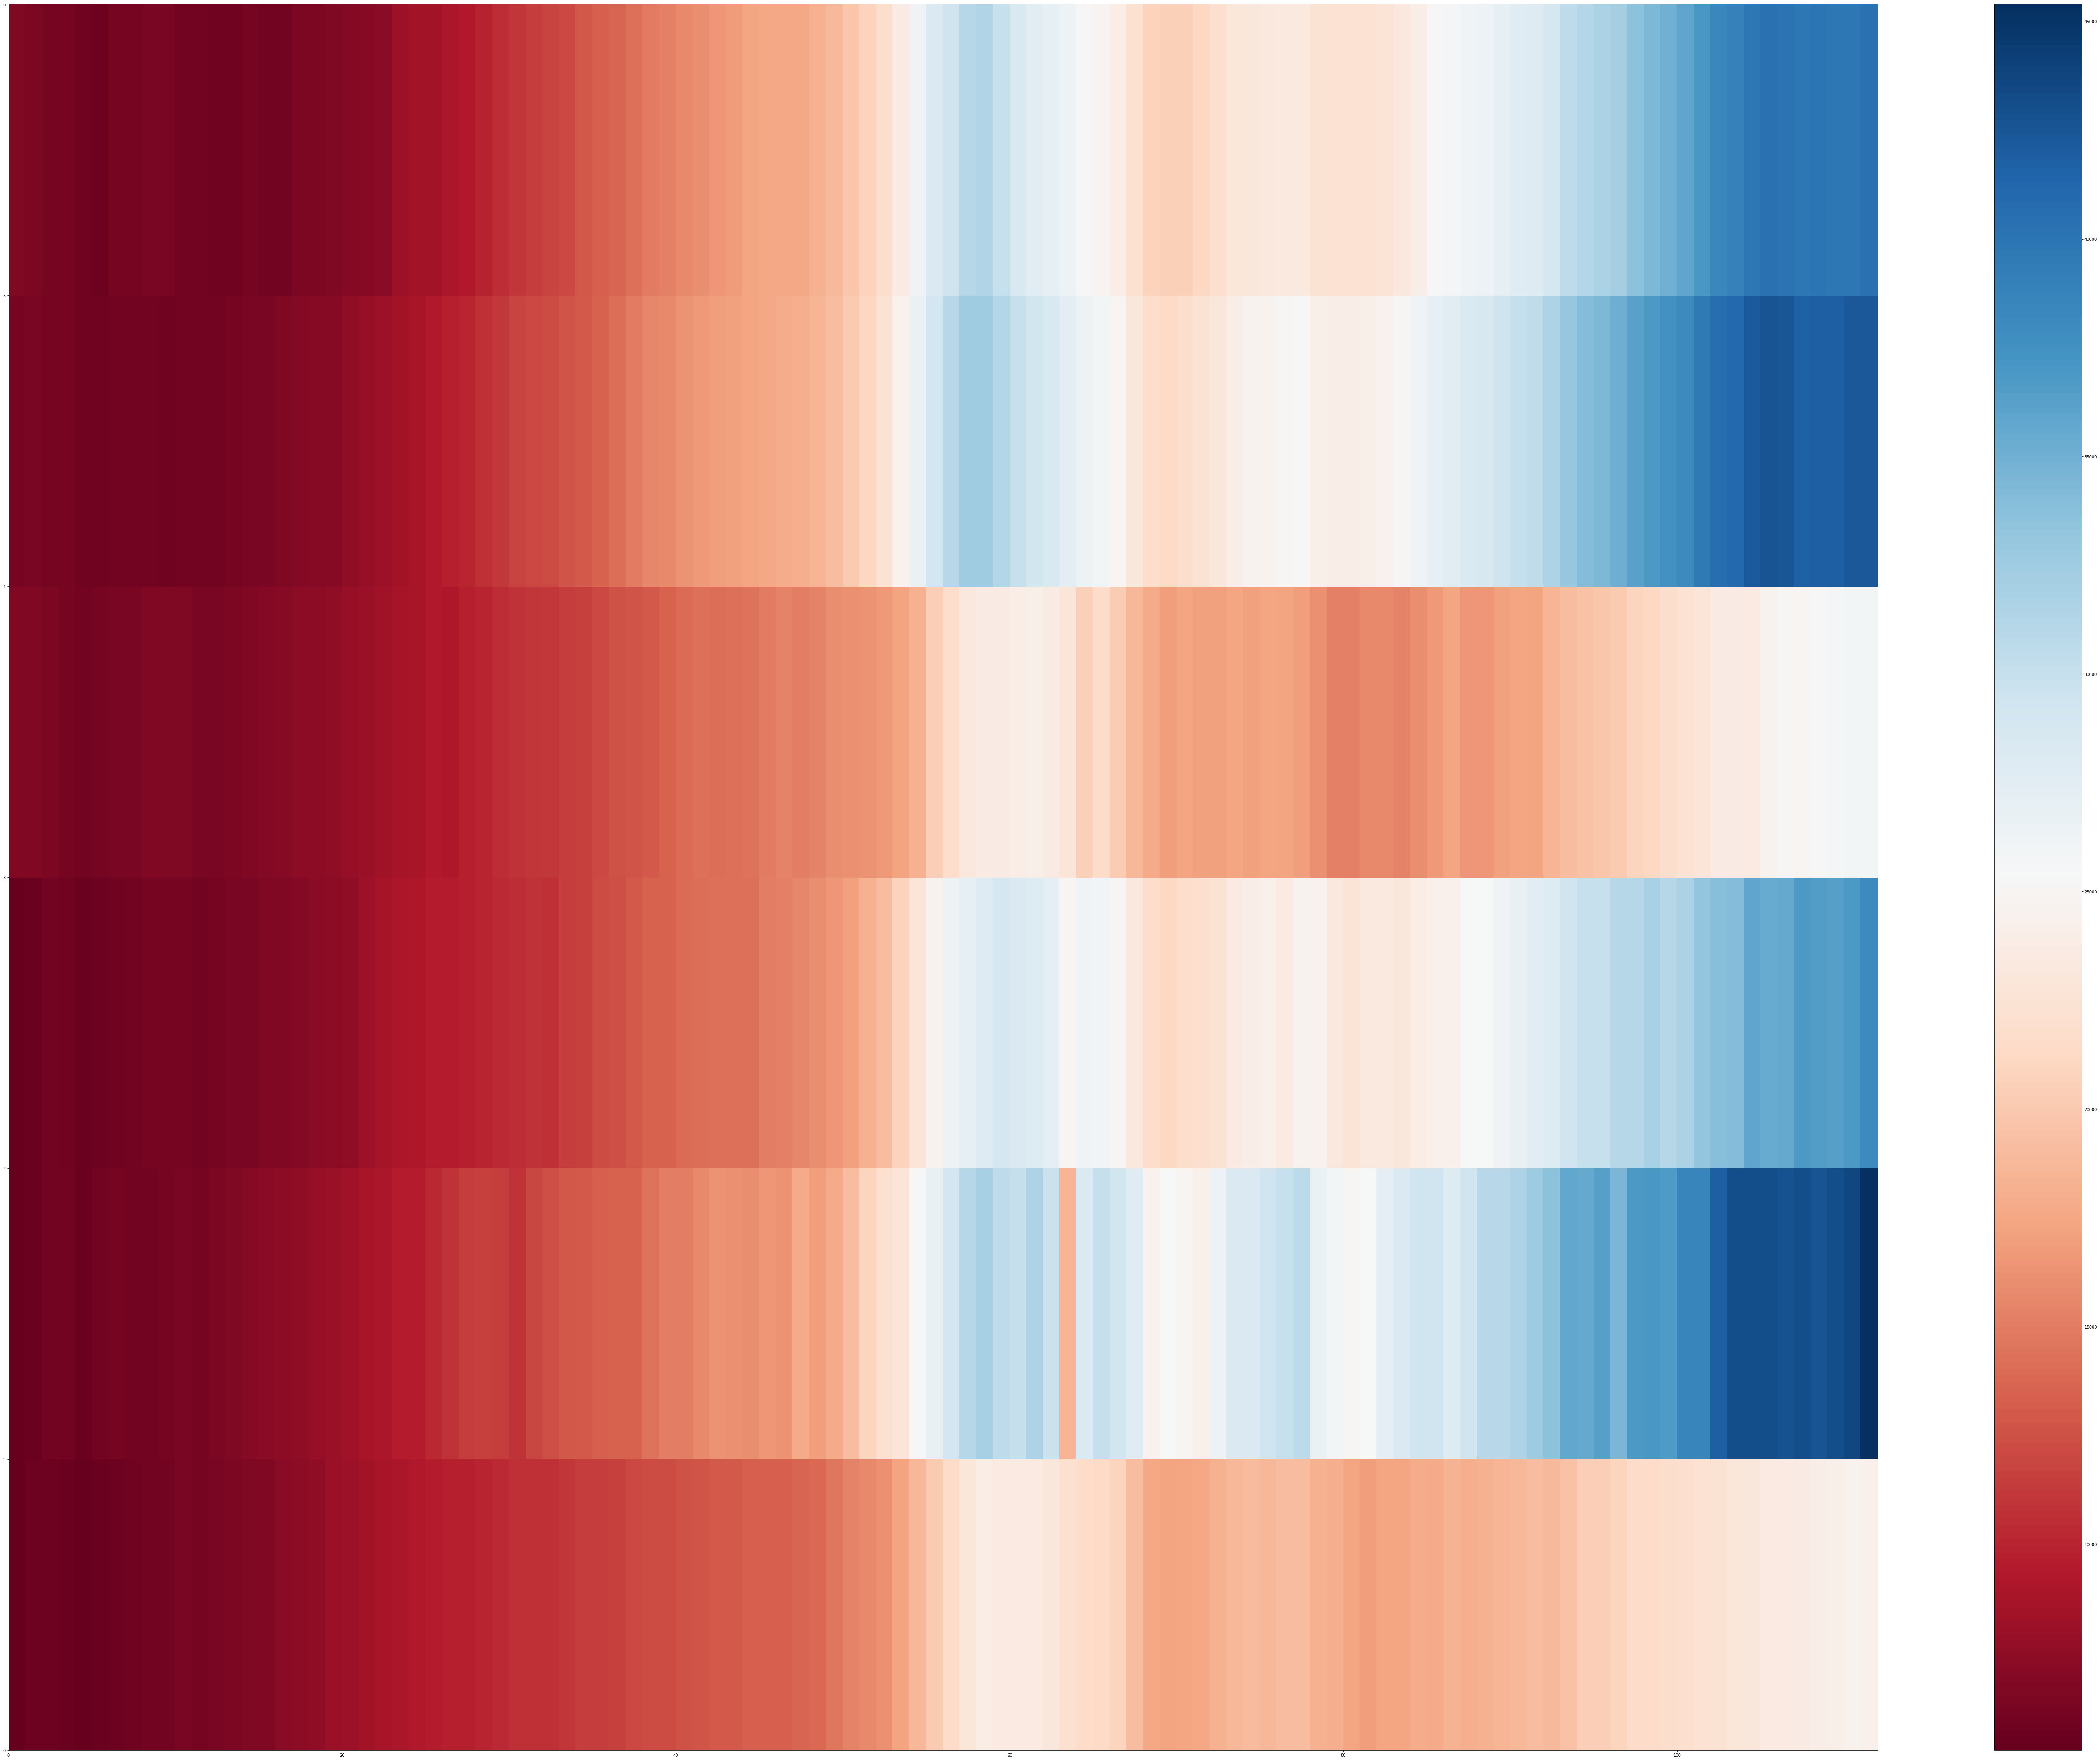

In [681]:
plt.figure()
plt.figure(figsize=(80,60))
plt.pcolor(H_pivoted,cmap='RdBu')
plt.tight_layout()
plt.colorbar()
plt.show()
#plt.title('at z = ' + ('%.3f' % zs[i]) + '    u' + ['x', 'y', 'z'][d])


No handles with labels found to put in legend.


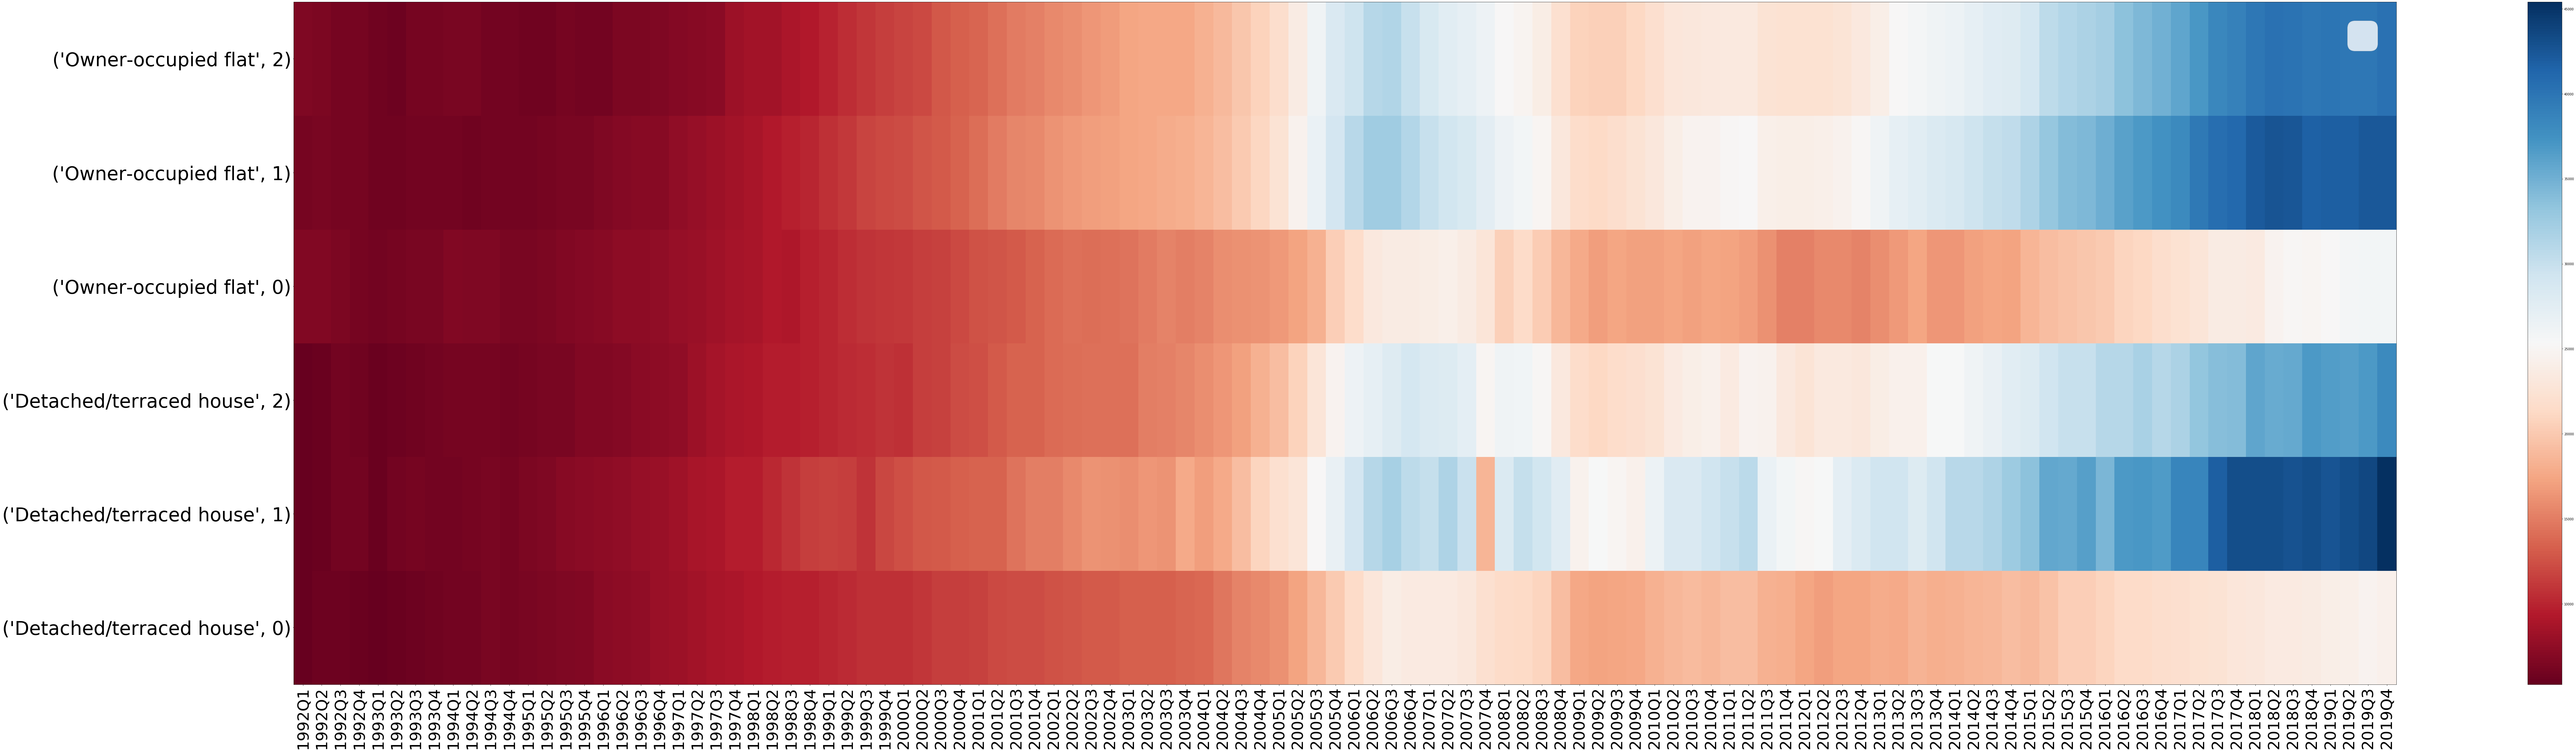

In [682]:
fig, ax = plt.subplots()
im = ax.pcolor(H_pivoted, cmap='RdBu')


#label names
row_labels = H_pivoted.columns
col_labels = H_pivoted.index

#move ticks and labels to the center
ax.set_xticks(np.arange(H_pivoted.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(H_pivoted.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, {'fontsize': 50, 'fontweight': 20}, minor=False)
ax.set_yticklabels(col_labels,{'fontsize': 60, 'fontweight': 60}, minor=False)


#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
fig.set_figheight(40)
fig.set_figwidth(150)
ax.legend(prop=dict(size=120))
plt.show()

anova Analysis of Variance between the clusters 

https://www.coursera.org/learn/data-analysis-with-python/lecture/AeQV6/analysis-of-variance-anova